# Problem 2.10

## Part a.

There will be $100,000 / (50 / 0.34) = 680$ steps in the random walk, so the RMS distance will be

$$
d \sim 50 \sqrt{680} \, \textrm{nm} \approx 1.3 \mu\textrm{m}
$$

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
100_000 / (50 / .34)

680.0

In [3]:
50 * np.sqrt(680)

1303.8404810405298

## Part b.

In two dimensions, we would expect a standard random walk to return to the origin after an arbitrarily long period of time.

Consider a random walk that takes place on a two dimensional lattice.  After a large number of time steps $N$, the walker is a distance $\sim\sqrt{N}$ from the origin.  The walk has encountered $N$ points and has been constrained to an area of $\sim\pi N$.  Note, then that the ratio of the points encountered to the area in which they are encountered is independent of $N$.  Thus, over time, the probability that the walk always misses a point that it has always encountered decays to 0.

## Part c.

In [ ]:
prev_x = 

In [71]:
def self_avoiding_walk(N_max):
    prev_x = np.array((0, 0))
    x = np.array((0, 0))
    points_encountered = set(x)
    trajectory = [tuple(x)]
    
    directions = set([(1, 0), (-1, 0), (0, 1), (0, -1)])
    for _ in range(N_max):
        past_direction = tuple(prev_x - x)
        
        next_directions = list(directions - set([past_direction]))
        idx_next_direction = np.random.randint(len(next_directions))
        next_direction = next_directions[idx_next_direction]
        
        prev_x = x.copy()
        x += np.array(next_direction)
        
        if tuple(x) in points_encountered:
            break
        
        points_encountered.add(tuple(x))
        trajectory.append(tuple(x))
    
    return np.array(trajectory)

In [72]:
trajectory = self_avoiding_walk(10)

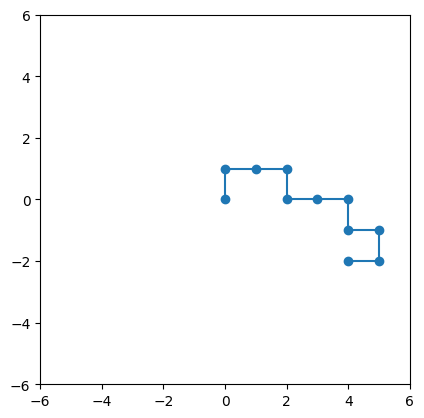

In [73]:
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[:, 0], trajectory[:, 1])
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.gca().set_aspect('equal')

In [74]:
trajectory = self_avoiding_walk(100)

In [75]:
trajectory.shape

(21, 2)

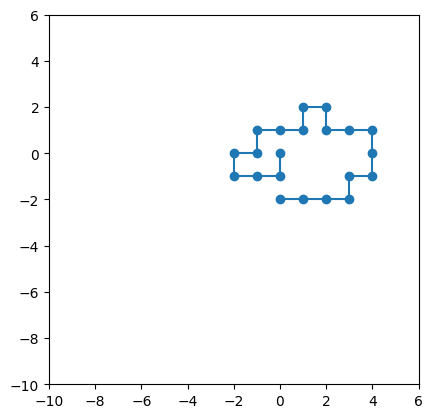

In [76]:
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[:, 0], trajectory[:, 1])
plt.xlim([-10, 6])
plt.ylim([-10, 6])
plt.gca().set_aspect('equal')

In [86]:
trajectory = self_avoiding_walk(10_000)
while len(trajectory) < 100:
    trajectory = self_avoiding_walk(10_000)

In [87]:
trajectory.shape

(129, 2)

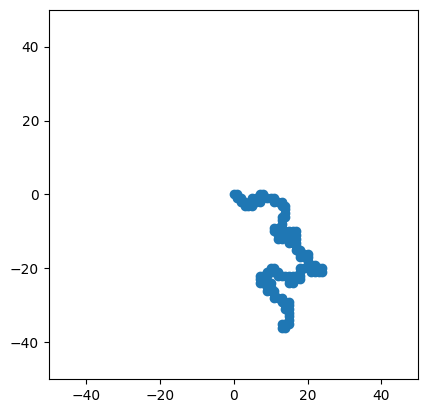

In [88]:
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[:, 0], trajectory[:, 1])
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.gca().set_aspect('equal')

In [90]:
d = np.linalg.norm(trajectory, axis=1)

In [92]:
X = np.arange(len(trajectory))

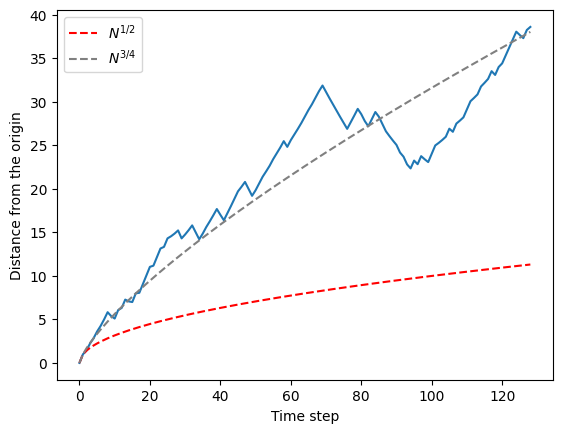

In [97]:
plt.plot(X, d)
plt.plot(X, np.sqrt(X), label=r'$N^{1/2}$', linestyle='--', c='red')
plt.plot(X, X**(3/4), label=r'$N^{3/4}$', linestyle='--', c='gray')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Distance from the origin');